#                                                  SENTIMENT ANALYSIS
<br><br>

## INTRODUCTION

Text classification is one of the fundamental task in Natural Language Processing. The goal is to assign labels to text. It has broad applications including topic labeling, sentiment classification (Maas et al., 2011; Pang and Lee, 2008), and spam detection. Traditional approaches of text classification represent documents with sparse lexical features, such as n-grams, and then use a linear model or kernel methods on this representation. More recent approaches used deep learning, such as convolutional neural networks (Blunsom et al., 2014) and recurrent neural networks based on long short-term memory (LSTM) (Hochreiter and Schmidhuber, 1997) to learn text representations.<br><br>  
Sentiment analysis is one of it's applications, which can be defined as:  
The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

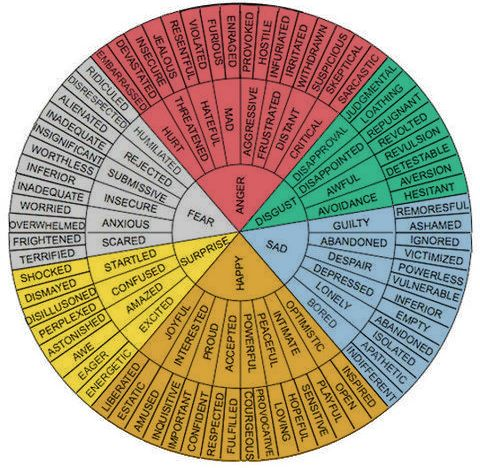

In [3]:
from IPython.display import Image
Image(filename='emotion.jpg')

To classify text we need to classify emotions. 
There are six basic emotions possessed by humans : ANGER , DISGUST, FEAR, HAPPINESS, SADNESS & SURPRISE. 
The additional emotions possessed are further sub-set or they are a combination of these six basic emotions: 

# Emotion
Emotion is any relatively brief conscious experience characterized by intense mental activity and a high degree of pleasure or displeasure. Scientific discourse has drifted to other meanings and there is no consensus on a definition. Emotion is often intertwined with mood, temperament, personality, disposition, and motivation. In some theories, cognition is an important aspect of emotion. Those acting primarily on the emotions they are feeling may seem as if they are not thinking, but mental processes are still essential, particularly in the interpretation of events. For example, the realization of our believing that we are in a dangerous situation and the subsequent arousal of our body's nervous system (rapid heartbeat and breathing, sweating, muscle tension) is integral to the experience of our feeling afraid. Other theories, however, claim that emotion is separate from and can precede cognition.

# Multi-dimensional analysis
Through the use of multidimensional scaling, psychologists can map out similar emotional experiences, which allows a visual depiction of the "emotional distance" between experiences. A further step can be taken by looking at the map's dimensions of the emotional experiences.

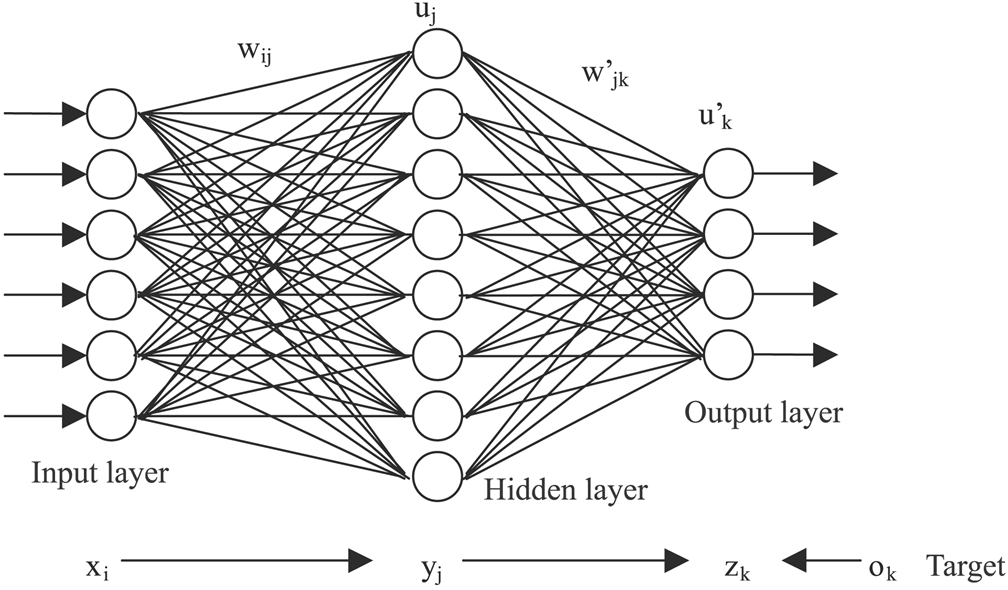

In [4]:
from IPython.display import Image
Image(filename='NeuralNetwork.png')

<br>
# Previous Approaches 
Standard approaches to NLP, some years ago involved extracting a set of features from some labeled piece of text, the features were usually N-grams. Once the N-grams were extracted the next step was to train a linear model on some pre-labeled data so that similar text could be classified.Some of them areshown below.  <br><br>

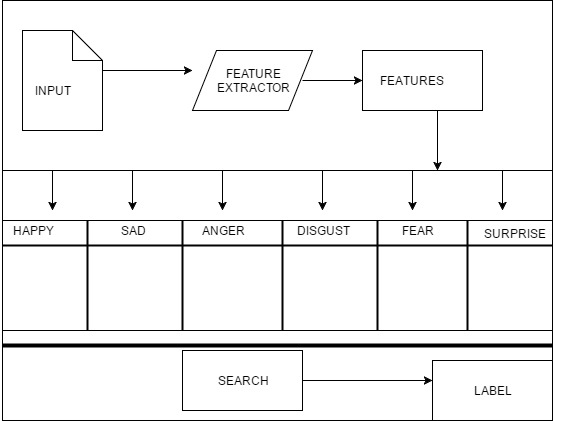

In [5]:
from IPython.display import Image
Image(filename='MODEL1.jpg')

MODEL 1 above is a non Machine Learning model which uses the basic idea to search specific emotional words(features) in the list of the six lists above. When the word is found in any of the list, it assigns the label to it.

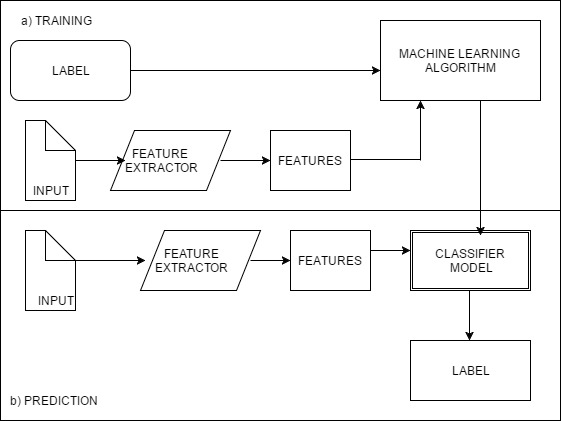

In [6]:
from IPython.display import Image
Image(filename='MODEL2.jpg')

MODEL 2 shown above is a simple classification model, which is trained to label words, and based on that it further predicts 
the label of given test sentence.


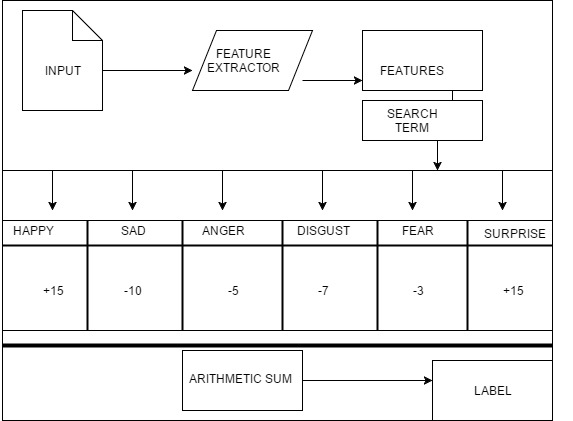

In [7]:
from IPython.display import Image
Image(filename='MODEL3.jpg')

MODEL3 above uses arithmetic sum to label the data. Each emotion is given a specific arithmetic value. When any feature is found in any list, the sum is incremented for that list. This process is done till the completion of a given sentence or paragraph. In the end the total sum is taken from all the lists and the final value assingns the label to the test input. 

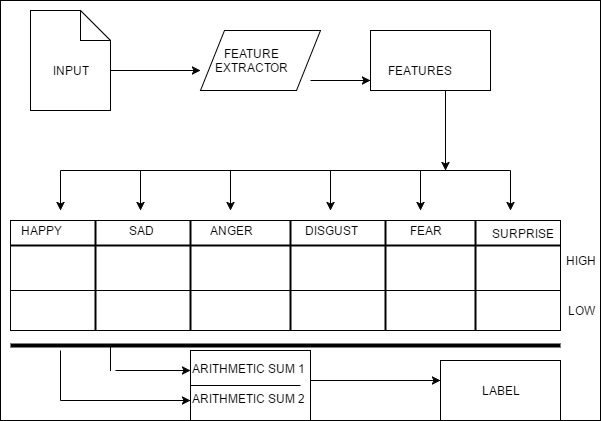

In [8]:
from IPython.display import Image
Image(filename='MODEL4.jpg')

MODEL 4 separates the features into futher two categories: High level features and Low level features. Which are assigned different weightages. Once the features are found and categoried, the weighted mean is taken and label is assigned to the test input. 

The process of feature extraction became highly popular by open sourcing "Google's word2vec". It's a toolkit which helps to code words into vectors, these vectors are representation of word called Word Embeddings that are trained on a given corpus. 

The kit consists of two models named Skip-Ngram and Continuous Bag of Words(CBW).These models helps to encode words. Once vectors are obtained we can use them for Sentiment Analysis. 

# Hierarchical Attention Networks for Document Classification 

 Zichao Yang constructed a new neural architecture to model a document. It starts by encoding words and applying an attention mechanism to extract the most important words. Then, it encodes the sentence by using the weights it learned and applies an attention mechanism to it again to extract the most important sentence, which consequently builds a document level vector. 
So, it creates vectors for each layer of abstraction within a document and builds them one over the other. The encoder for each of these levels is called a Gated Recurrent Unit (GRU) neural network. 
So, after we initialize the model using vectors from word2vec, it is trained on this new neural network, which outperforms every other model mentioned above.

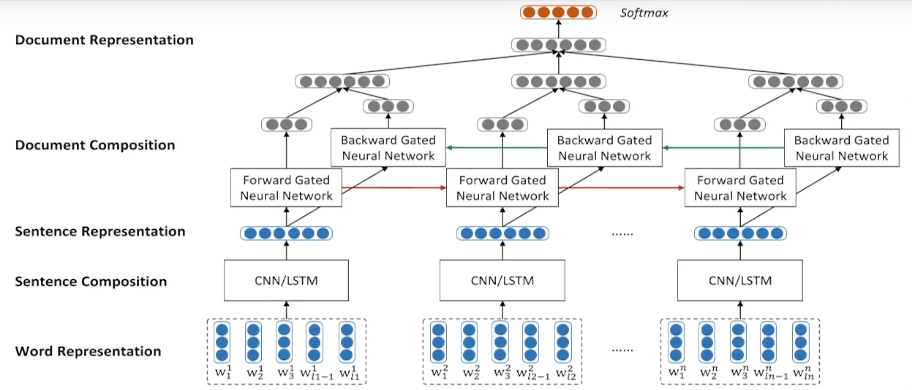

In [9]:
from IPython.display import Image
Image(filename='NEW.PNG')

# IBM WATSON
The code written below is using IBM WATSON TONE ANALYSER which works on the same idea and produces the results.
The video below gives a small idea how watson works.

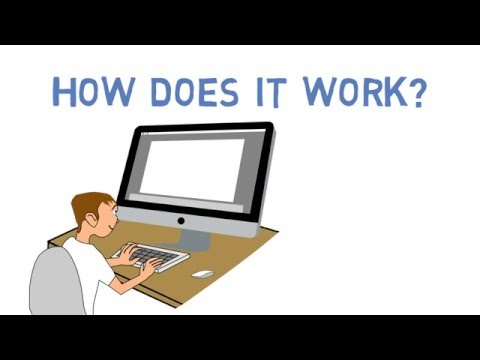

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("wUb--6FPBik")

In [12]:
# Author: Sahil Verma


'''Importing necessary lib csv for output, watson_developer_cloud for Analyse
    matplotlib for ploting, numpy to make array '''
import csv
from watson_developer_cloud import ToneAnalyzerV3
import matplotlib.pyplot as plt
import numpy as np



#Taking input
texted= input("Enter the sentence to analyse \n")  


#API request from IBM Watson
tone_analyzer = ToneAnalyzerV3(
username='',                                                               #Enter the username and password provided by bluemix
password='',
version='2016-05-19 ')
result =tone_analyzer.tone(text=texted)                                     #Getting output as a file of dictonary 




xyz=[]

for x in result["document_tone"]["tone_categories"][0].get("tones"):        #Selecting specific Emotion is result 
    xyz.append(x)

print(xyz)                                                                  #Printing Emotions as text


#Writing Input and Output to csv file 
def write2csv():
    f = open("output.csv","w")

    w = csv.DictWriter(f,("Input","e1","e2","e3","e4"))
    w.writeheader()

    x = xyz
    op = {}
        
    op = {"Input":texted,
        "e1":(x[0].get("tone_name").strip(),x[0].get("score")),
       "e2":(x[1].get("tone_name"),x[1].get("score")),
       "e3":(x[2].get("tone_name"),x[2].get("score")),
       "e4":(x[3].get("tone_name"),x[3].get("score")),
       }

    w.writerow(op)
    
    f.flush()
    f.close()

write2csv()


#Taking emotions to visulisation creating array and plotting it using matplotlib
emotion = []
values = []
X = [1,2,3,4,5]
scale = np.array([0.0000,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

for x in xyz:
    emotion.append(x.get("tone_name"))
    values.append(x.get("score"))


plt.plot(X,values,'ro')                                                     #Plot value 
plt.xticks(X,emotion,rotation='vertical')
plt.show()





{
  "document_tone": {
    "tone_categories": [
      {
        "category_id": "emotion_tone",
        "category_name": "Emotion Tone",
        "tones": [
          {
            "tone_name": "Anger",
            "score": 0.054238,
            "tone_id": "anger"
          },
          {
            "tone_name": "Disgust",
            "score": 0.009638,
            "tone_id": "disgust"
          },
          {
            "tone_name": "Fear",
            "score": 0.015315,
            "tone_id": "fear"
          },
          {
            "tone_name": "Joy",
            "score": 0.805389,
            "tone_id": "joy"
          },
          {
            "tone_name": "Sadness",
            "score": 0.112907,
            "tone_id": "sadness"
          }
        ]
      },
      {
        "category_id": "language_tone",
        "category_name": "Language Tone",
        "tones": [
          {
            "tone_name": "Analytical",
            "score": 0.398794,
            "tone_id": "analy

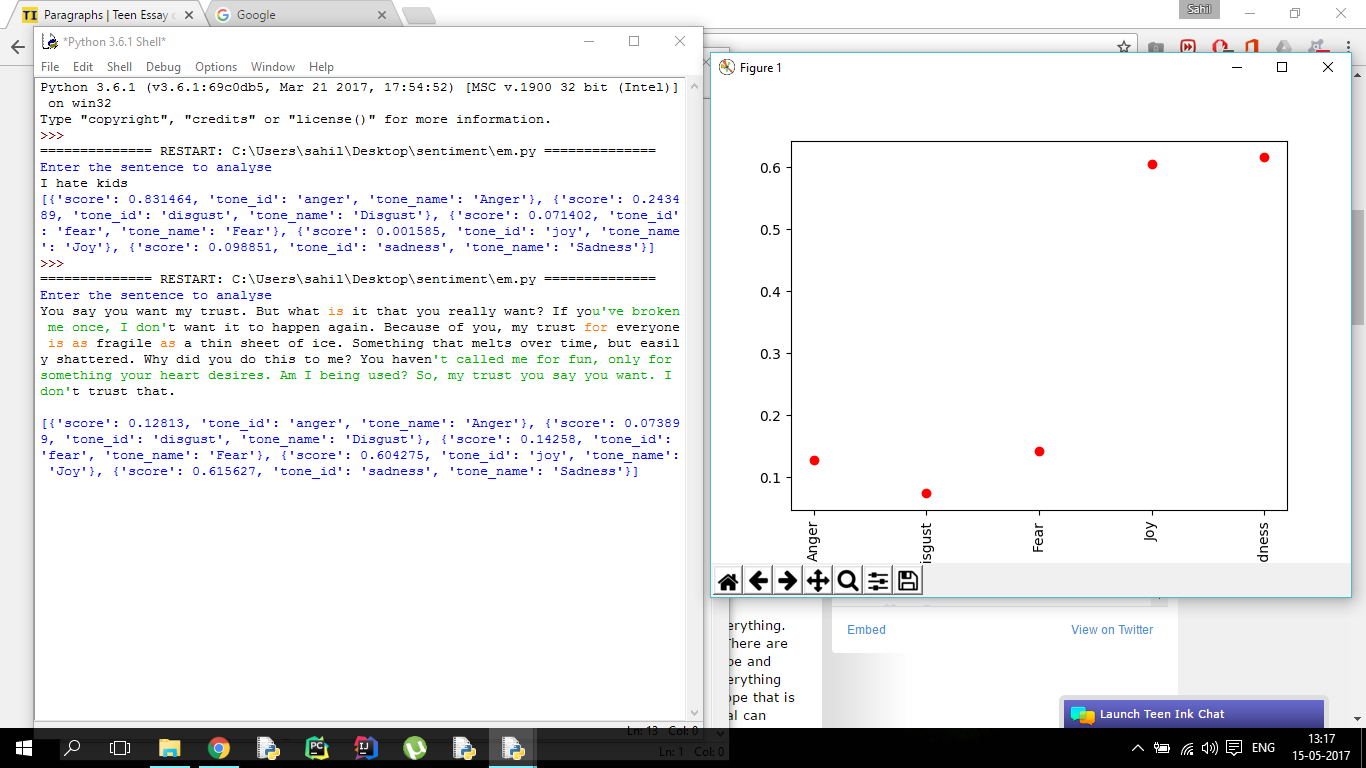

In [13]:
from IPython.display import Image
Image(filename='output1.png')

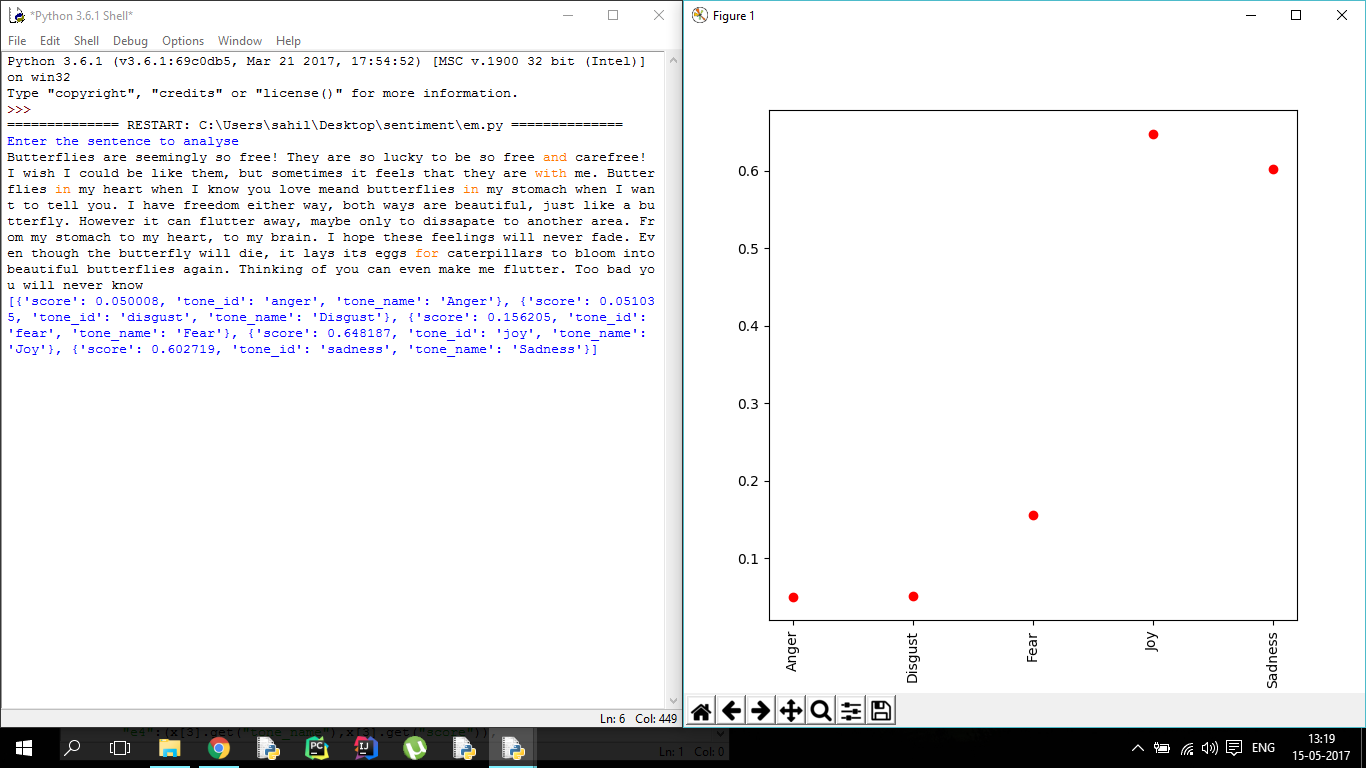

In [14]:
from IPython.display import Image
Image(filename='output2.png')

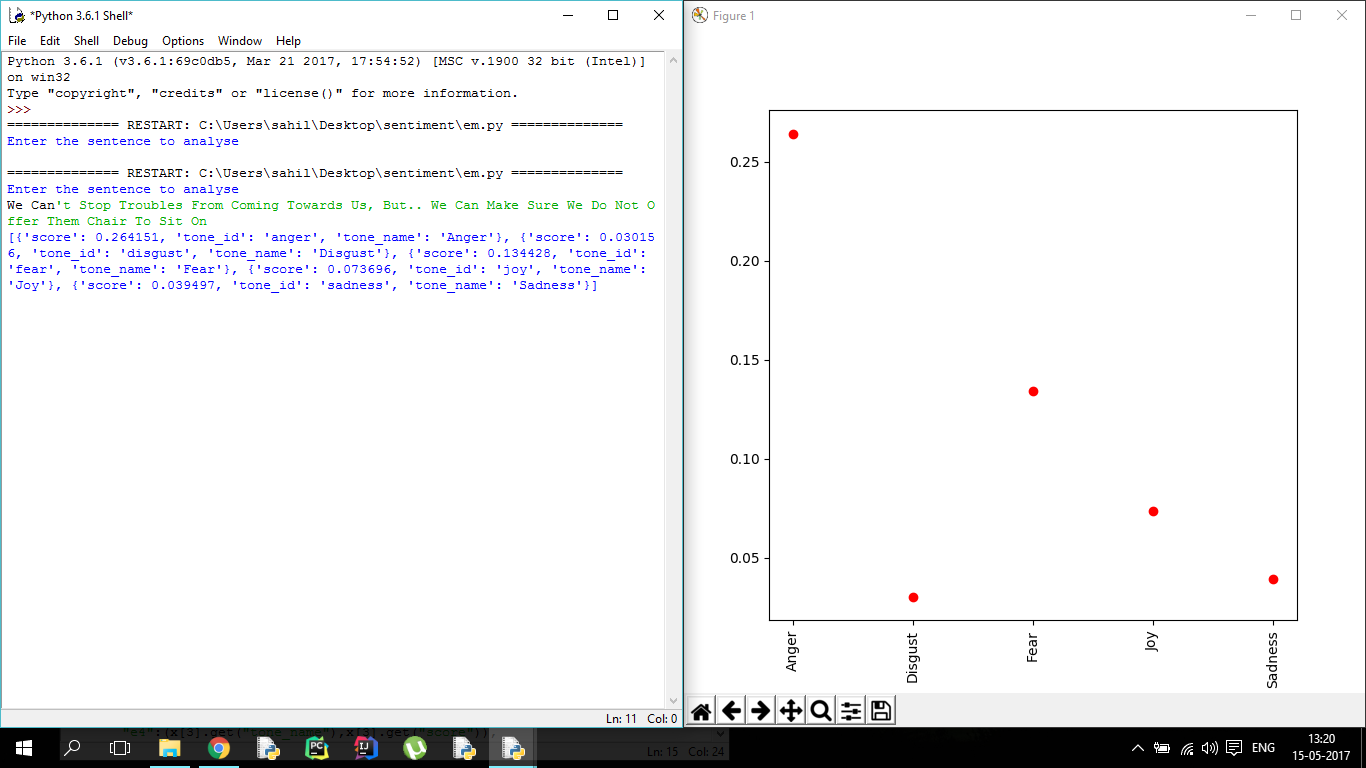

In [15]:
from IPython.display import Image
Image(filename='output3.png')

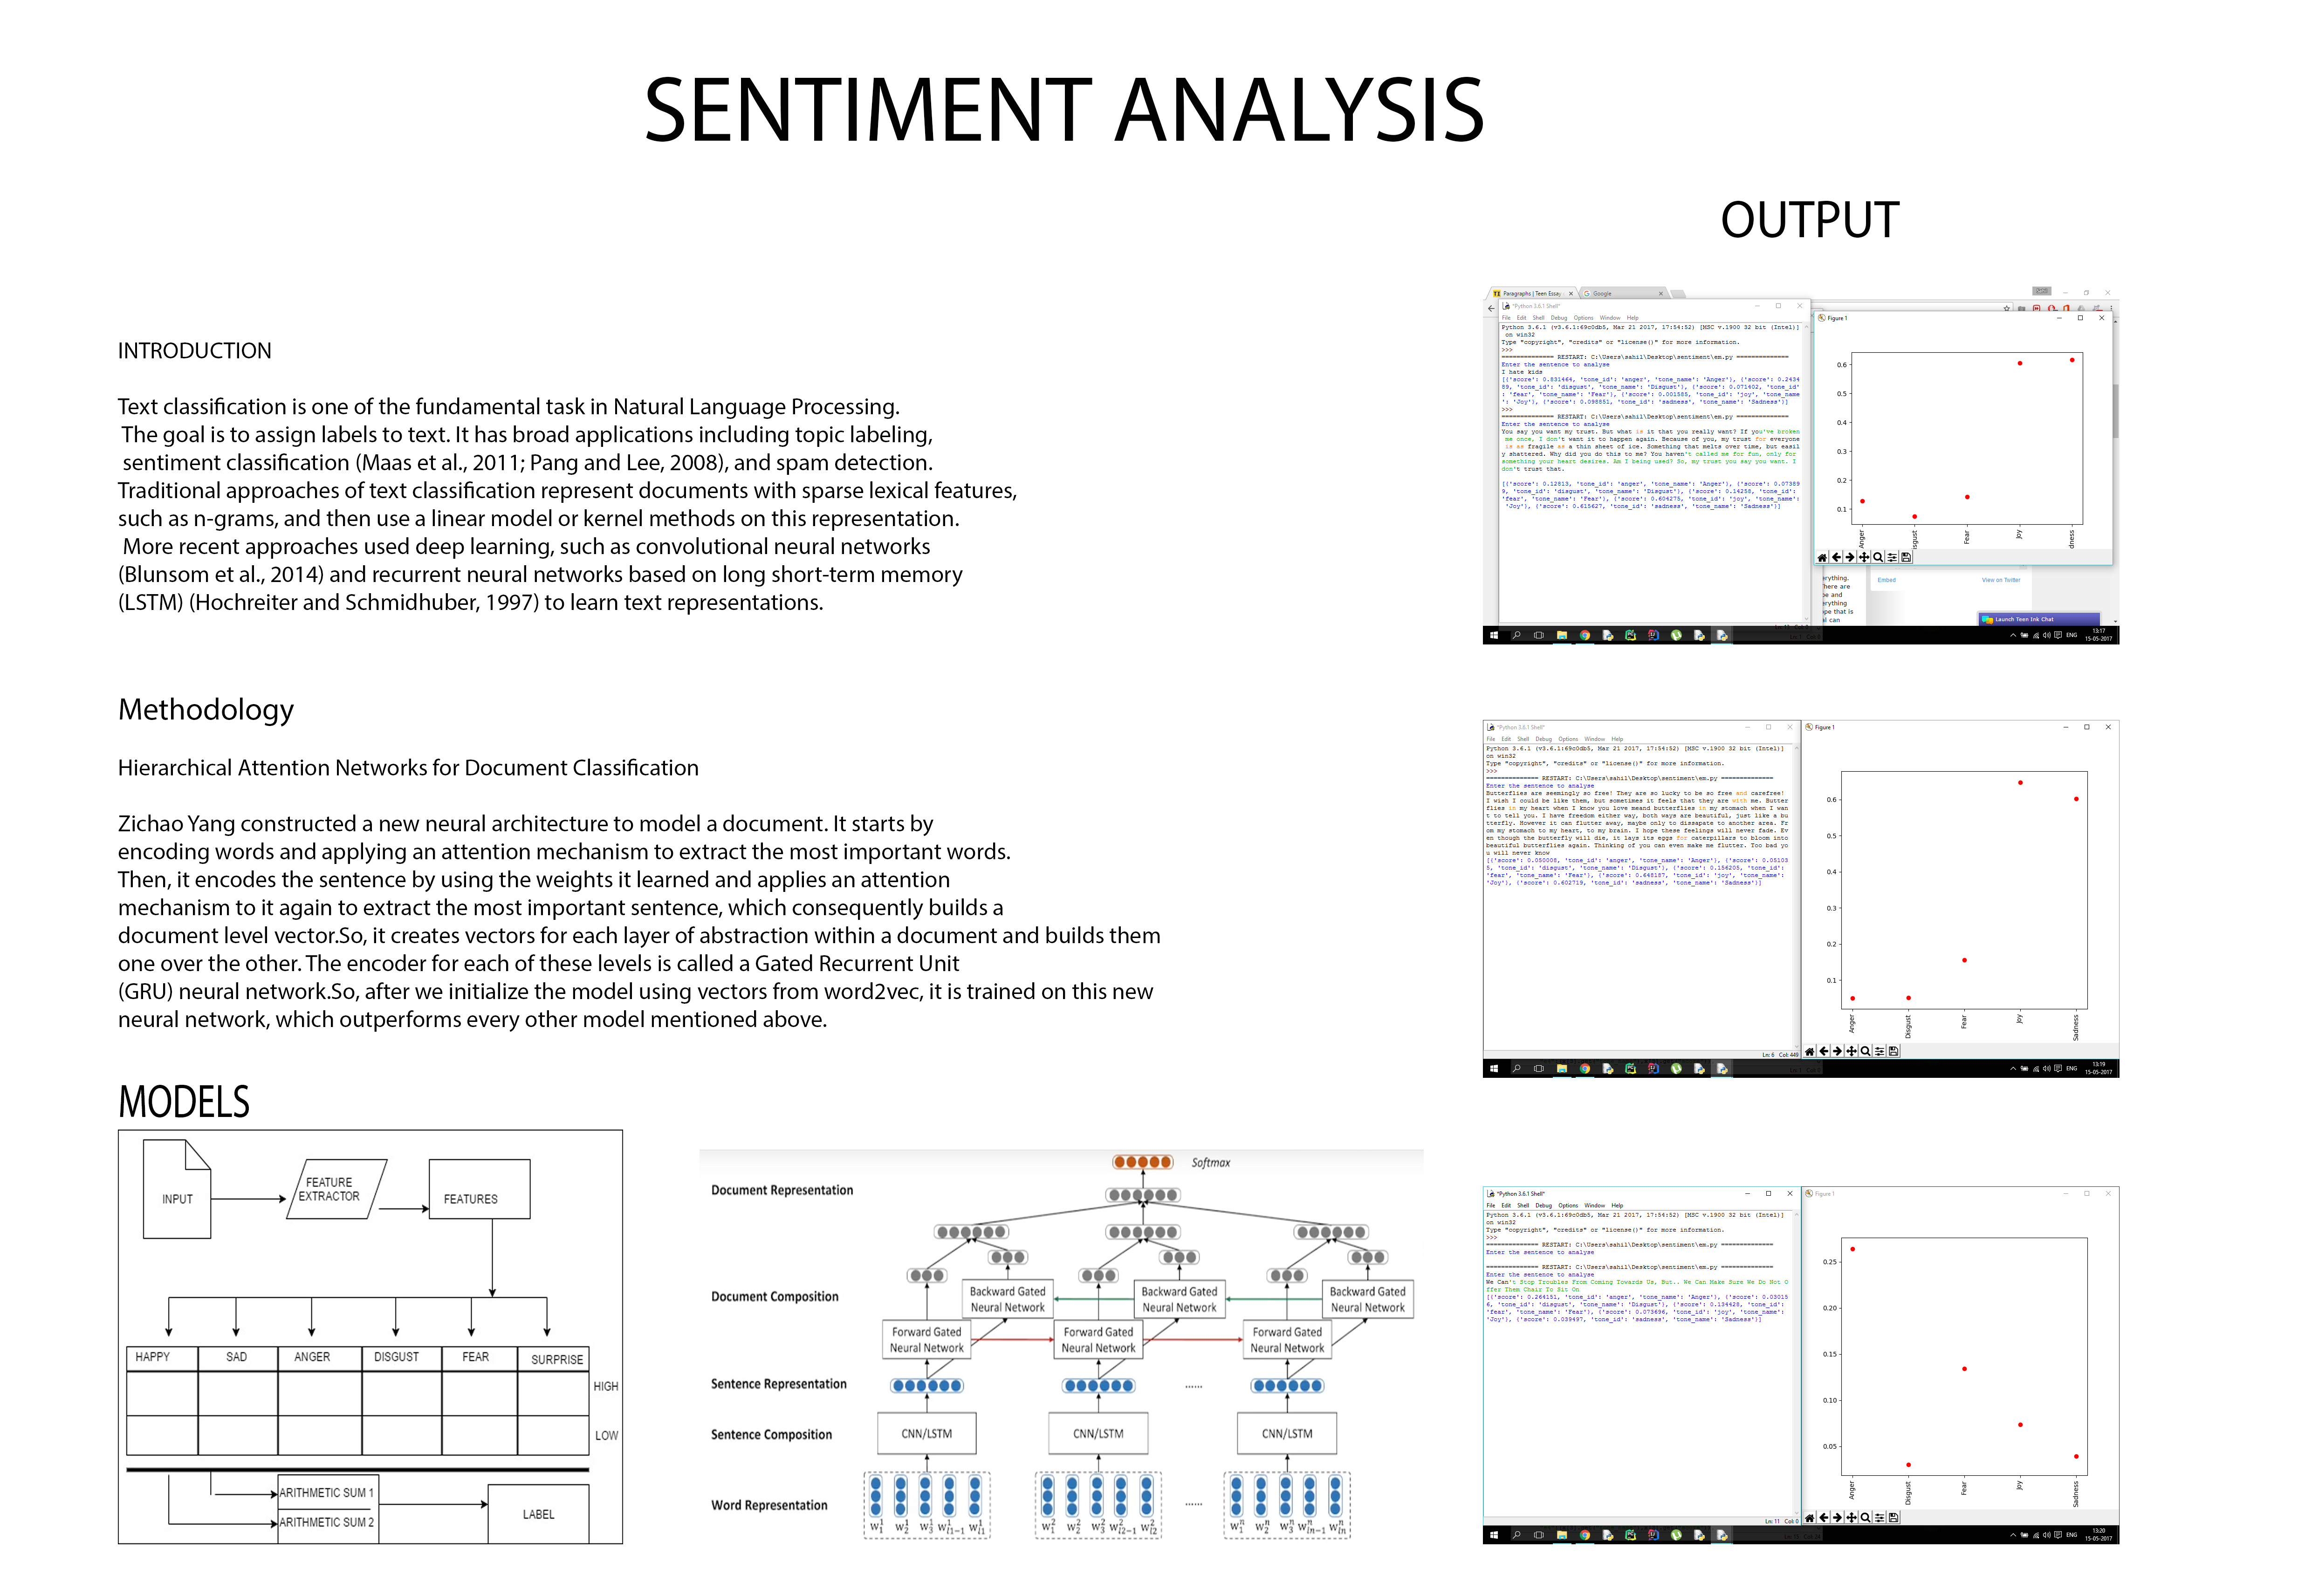

In [16]:
from IPython.display import Image
Image(filename='poster.jpg')


# Conclusion
The <b>Hierarchical Attention Networks for Document Classification</b> is able to get better results as compared to the other models which makes it easy for the computer to analyse Sentiments.
If machines are able to analyse sentiments, it can be further used into many aspects and human needs.
like personal psychologist,better personal assistantts and chatbots, etc.

# References
1. Siraj Raval Tone analyser (https://youtu.be/89FHXM2q36s)
2. Hierarchical Attention Networks for Document Classification (http://www.aclweb.org/anthology/N16-1174)